In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/GitHub/ERA-V1/Assignments/S10

Mounted at /content/drive
/content/drive/MyDrive/GitHub/ERA-V1/Assignments/S10


In [2]:
!git pull

remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 5 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (5/5), 917 bytes | 0 bytes/s, done.
From https://github.com/selvaraj-sembulingam/ERA-V1
   07436b7..5c0c5d2  main       -> origin/main
Updating 07436b7..5c0c5d2
Fast-forward
 Assignments/S10/train.py | 7 ++++---
 1 file changed, 4 insertions(+), 3 deletions(-)


In [3]:
!pip install torchsummary
!pip install albumentations
!pip install torch_lr_finder

In [4]:
from src.utils import model_summary
model_summary()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 256,

In [5]:
!python train.py

Files already downloaded and verified
Files already downloaded and verified
Epoch 0
Train: Loss=1.1034 Batch_id=97 Accuracy=49.64: 100% 98/98 [00:20<00:00,  4.83it/s]
Test set: Average loss: 0.0021, Accuracy: 6324/10000 (63.24%)

Epoch 1
Train: Loss=0.7651 Batch_id=97 Accuracy=68.26: 100% 98/98 [00:19<00:00,  5.06it/s]
Test set: Average loss: 0.0016, Accuracy: 7226/10000 (72.26%)

Epoch 2
Train: Loss=0.5360 Batch_id=97 Accuracy=76.79: 100% 98/98 [00:19<00:00,  4.94it/s]
Test set: Average loss: 0.0014, Accuracy: 7596/10000 (75.96%)

Epoch 3
Train: Loss=0.5948 Batch_id=97 Accuracy=80.82: 100% 98/98 [00:19<00:00,  4.91it/s]
Test set: Average loss: 0.0011, Accuracy: 8143/10000 (81.43%)

Epoch 4
Train: Loss=0.3891 Batch_id=97 Accuracy=83.82: 100% 98/98 [00:21<00:00,  4.59it/s]
Test set: Average loss: 0.0010, Accuracy: 8325/10000 (83.25%)

Epoch 5
Train: Loss=0.5075 Batch_id=97 Accuracy=85.55: 100% 98/98 [00:20<00:00,  4.81it/s]
Test set: Average loss: 0.0009, Accuracy: 8413/10000 (84.13%)



In [6]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   S10.ipynb
	deleted:    results/S9Model1.pth
	modified:   results/incorrect_images.png
	modified:   results/loss_accuracy_plot.png

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	results/CustomResNet.pth
	results/lr_finder_plot.png
	src/__pycache__/
	../data/

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
!git add S10.ipynb results/

Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/200 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 4.79E-02


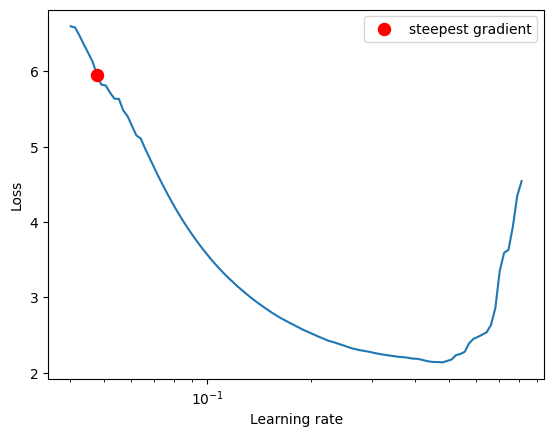

(<Axes: xlabel='Learning rate', ylabel='Loss'>, 0.04785923770503283)

In [22]:
import os
import torch
from src import data_setup, engine, custom_resnet, utils
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torch.optim.lr_scheduler import OneCycleLR
from torchvision import transforms
from torch_lr_finder import LRFinder
import matplotlib.pyplot as plt




torch.manual_seed(1)

# Setup hyperparameters
NUM_EPOCHS = 24
BATCH_SIZE = 512
LEARNING_RATE = 0.03
MOMENTUM = 0.9
MAX_LR = 5.22E-02
WEIGHT_DECAY = 1e-4

# Setup directories
train_dir = "../data"
test_dir = "../data"

# Setup target device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Create transforms
# Train Phase transformations
train_transforms = A.Compose([
    #A.HorizontalFlip(),
    #A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.2, rotate_limit=10, p=0.5),
    #A.CoarseDropout(max_holes=1, max_height=16, max_width=16, min_holes=1, min_height=16, min_width=16, fill_value=(0.49139968, 0.48215827, 0.44653124), mask_fill_value=None),  # Apply coarse dropout
    A.Normalize(mean=[0.49139968, 0.48215827, 0.44653124], std=[0.24703233, 0.24348505, 0.26158768]),  # Normalize the image
    ToTensorV2() # Convert image to a PyTorch tensor
])


# Test Phase transformations
test_transforms = A.Compose([
    A.Normalize(mean=[0.49139968, 0.48215827, 0.44653124], std=[0.24703233, 0.24348505, 0.26158768]),  # Normalize the image
    ToTensorV2()  # Convert image to a PyTorch tensor
])


# Create DataLoaders with help from data_setup.py
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    train_transforms=train_transforms,
    test_transforms=test_transforms,
    batch_size=BATCH_SIZE
)

# Create model with help from custom_resnet.py
model = custom_resnet.CustomResNet().to(device)

# Set loss and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(train_dataloader, end_lr=10, num_iter=200, step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
